In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import GridSearchCV

# Load MNIST dataset from TensorFlow
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape images from 2D (28x28) to 1D (784 features)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print("Training Data Shape:", x_train.shape)
print("Testing Data Shape:", x_test.shape)


Training Data Shape: (60000, 784)
Testing Data Shape: (10000, 784)


In [2]:
#Importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score  

#Creating a Random Forest model with some basic parameters
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

#Train the model fit on training data
rf_model.fit(x_train, y_train)  

y_pred = rf_model.predict(x_test) 
#Accuracy calculation
accuracy = accuracy_score(y_test, y_pred) 
print("Random Forest Model Accuracy:", round(accuracy, 4)) 



Random Forest Model Accuracy: 0.9705


**HYPERPARAMETER TUNNING** 


In [4]:
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import classification_report 

#Defining the hyperparameter grid
param_grid = {
    'n_estimators': [200, 300],  
    'max_depth': [5, 15, 25],  
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2]  
}

# Using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=1)
grid_search.fit(x_train, y_train)  

# Get the best parameters
print("Best Parameters Found:", grid_search.best_params_)

# Using the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(x_test)

# Check accuracy 
best_accuracy = accuracy_score(y_test, y_pred_best)
print("Tuned Random Forest Accuracy:", round(best_accuracy, 4))

# Evaluation using classification report
print("Classification Report:\n", classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters Found: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest Accuracy: 0.9718
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



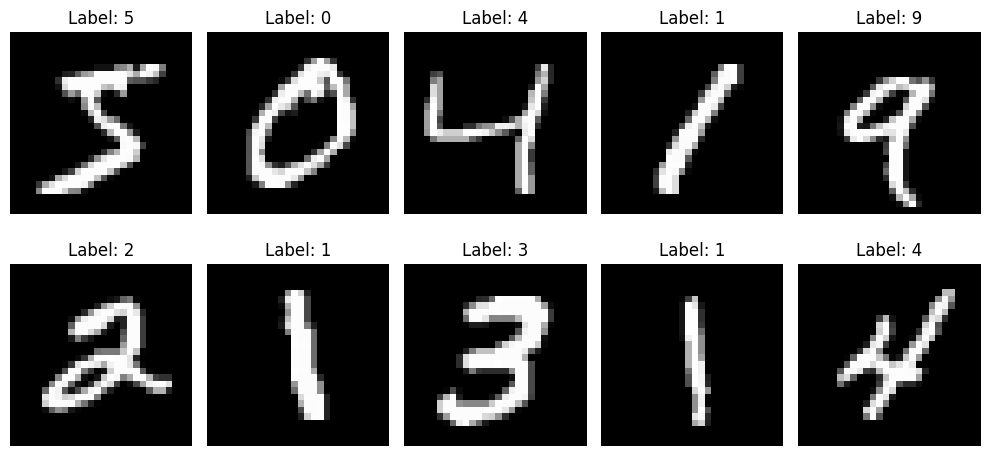

In [6]:
import matplotlib.pyplot as plt


# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Plot some sample images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
import pickle
import time

# Generate timestamp in the format "DD-MM-YYYY-HH:MM:SS"
timestamp = time.strftime("%d-%m-%Y, %H-%M-%S")

# Define filename with parameters and formatted timestamp
model_filename = f"rf_mnist_depth25_estimators300_{timestamp}.pkl"

# Save the model
with open(model_filename, "wb") as model_file:
    pickle.dump(best_rf_model, model_file)

print(f"✅ Model saved as {model_filename}")


✅ Model saved as rf_mnist_depth25_estimators300_10-02-2025, 23-30-26.pkl


In [7]:
!pip install mlflow


In [15]:
import mlflow
import mlflow.sklearn
import pickle
import time

#Set MLflow experiment
mlflow.set_experiment("Handwritten_Digit_Recognition")

#Start a new MLflow run for the third run
with mlflow.start_run():

    #Log hyperparameters for the third run
    mlflow.log_params({
        'max_depth': 25,
        'min_samples_leaf': 1,
        'min_samples_split': 2,
        'n_estimators': 300
    })

    #Log performance metrics
    accuracy = 0.9718 
    precision = 0.97   
    recall = 0.97      
    f1 = 0.97           

    mlflow.log_metrics({
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1
    })

    #Log the saved model as an artifact
    timestamp = time.strftime("%d-%m-%Y, %H-%M-%S")
    model_filename = f"rf_mnist_depth25_estimators300_{timestamp}.pkl"

    #Assuming you've already saved the model
    with open(model_filename, "wb") as model_file:
        pickle.dump(best_rf_model, model_file)

    #Log the model file as an artifact
    mlflow.log_artifact(model_filename)

    print("MLflow logging complete for the third run!")


MLflow logging complete for the third run!
